<a href="https://colab.research.google.com/github/UmeshikaThathsarani/FuelO/blob/feature%2Fmodel/FuelO_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
import joblib

# **Analyse Dataset**

In [11]:
#read the csv file
df1 = pd.read_csv('/content/Full_Dataset_Original.csv')
df1.head(5)

,Year,Make,Model,Class,Drive,Transmission,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,MPG,City Fuel Consumption,Highway Fuel Consumption
0,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,4,2.5,0,0,Regular Gasoline,17,4233.870,3998.655
1,1984,AM General,FJ8c Post Office,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,6,4.2,0,0,Regular Gasoline,13,3057.795,3057.795
2,1984,American Motors Corporation,Eagle 4WD,Special Purpose Vehicle 4WD,4-Wheel or All-Wheel Drive,Automatic 3-Speed,6,4.2,0,0,Regular Gasoline,17,3528.225,4704.300
3,1984,American Motors Corporation,Eagle 4WD,Special Purpose Vehicle 4WD,4-Wheel or All-Wheel Drive,Automatic 3-Speed,6,4.2,0,0,Regular Gasoline,17,3528.225,4469.085
4,1984,American Motors Corporation,Eagle 4WD,Special Purpose Vehicle 4WD,4-Wheel or All-Wheel Drive,Manual 4-Speed,4,2.5,0,0,Regular Gasoline,20,4469.085,5174.730


In [12]:
#get all the duplicates
dups = df1.duplicated()

#check whether there is any duplicates
print(dups.any())

False


In [13]:
#get the number of unique values in each column
counts = df1.nunique()
print(counts)

Year                          34
Make                         127
Model                       3662
Class                         34
Drive                          7
Transmission                  45
Engine Cylinders               9
Engine Displacement           65
Turbocharger                   2
Supercharger                   2
Fuel Type                      8
MPG                           74
City Fuel Consumption         73
Highway Fuel Consumption      74
dtype: int64


In [14]:
df1.dtypes

Year                          int64
Make                         object
Model                        object
Class                        object
Drive                        object
Transmission                 object
Engine Cylinders              int64
Engine Displacement         float64
Turbocharger                  int64
Supercharger                  int64
Fuel Type                    object
MPG                           int64
City Fuel Consumption       float64
Highway Fuel Consumption    float64
dtype: object

In [15]:
# Number of records of the dataset
len(df1)

37350

# **Outlier Removal**

<Axes: >

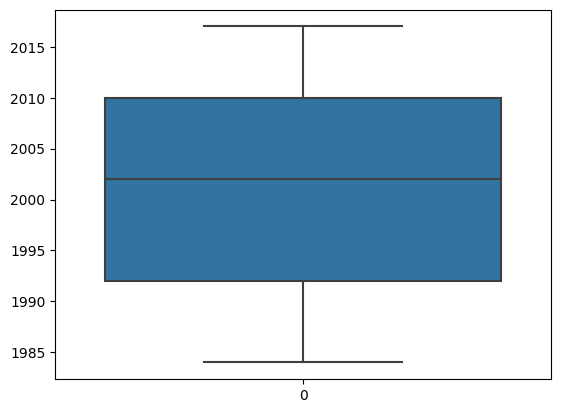

In [16]:
sns.boxplot(df1['Year'])

<Axes: >

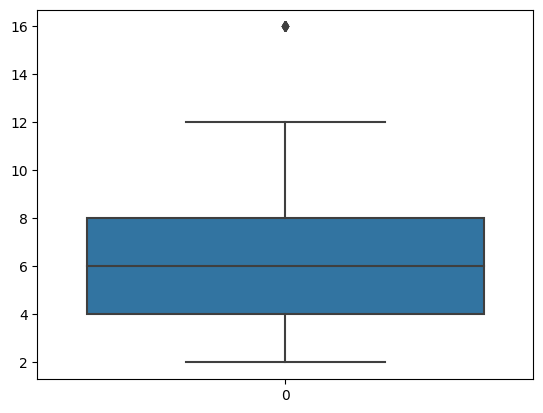

In [17]:
sns.boxplot(df1['Engine Cylinders'])

<Axes: >

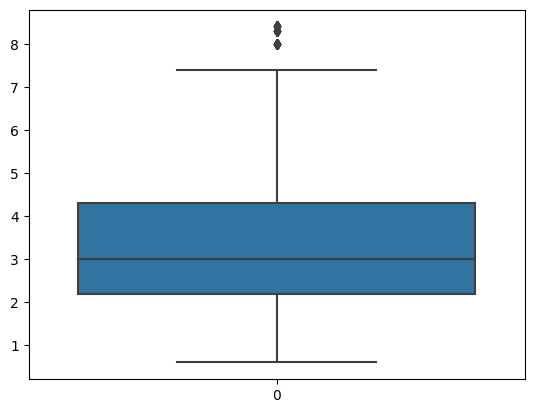

In [18]:
sns.boxplot(df1['Engine Displacement'])

<Axes: >

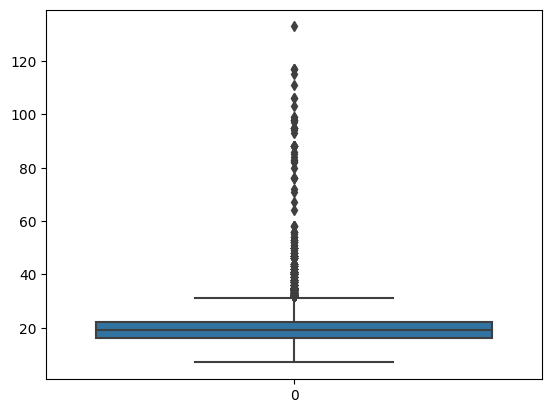

In [19]:
sns.boxplot(df1['MPG'])

In [20]:
q1 = df1['MPG'].quantile(0.25)
q3 = df1['MPG'].quantile(0.75)
iqr = q3 - q1

In [21]:
upper_limit = df1['MPG'].quantile(0.75) + 1.5 * iqr
lower_limit = df1['MPG'].quantile(0.25) - 1.5 * iqr

In [22]:
df2 = df1[(df1['MPG'] <= upper_limit) & (df1['MPG'] >= lower_limit)]

<Axes: >

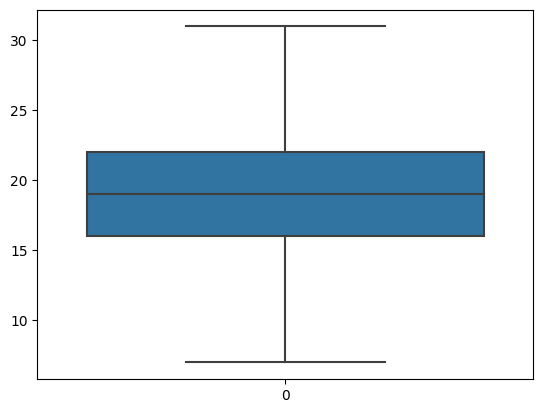

In [23]:
sns.boxplot(df2['MPG'])

<Axes: >

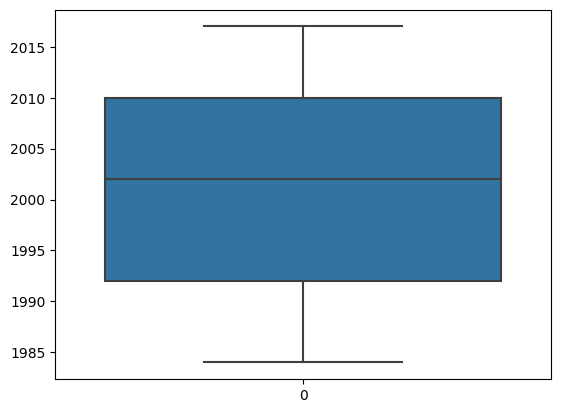

In [24]:
sns.boxplot(df2['Year'])

<Axes: >

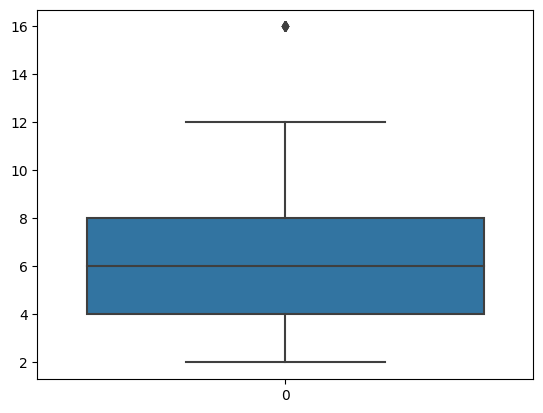

In [25]:
sns.boxplot(df2['Engine Cylinders'])

<Axes: >

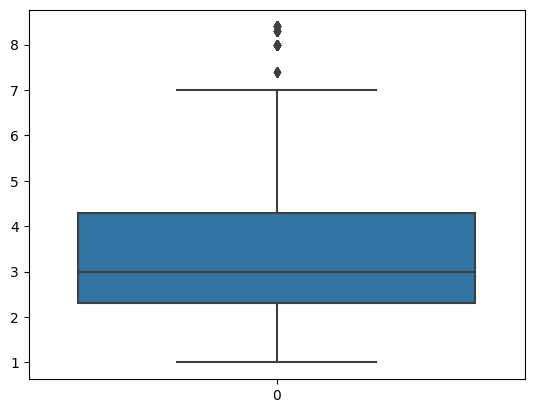

In [26]:
sns.boxplot(df2['Engine Displacement'])

<Axes: >

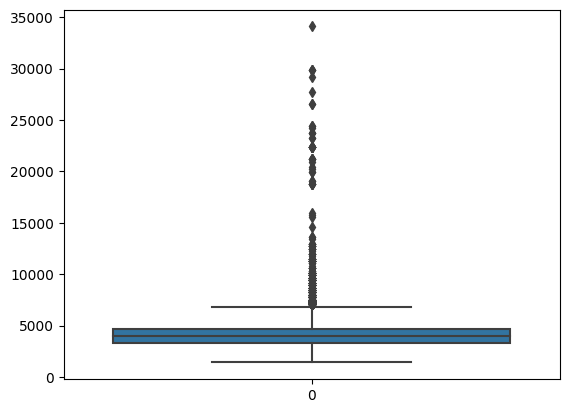

In [27]:
sns.boxplot(df1['City Fuel Consumption'])

<Axes: >

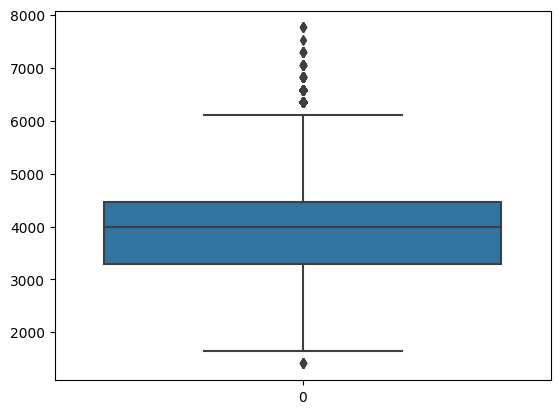

In [28]:
sns.boxplot(df2['City Fuel Consumption'])

<Axes: >

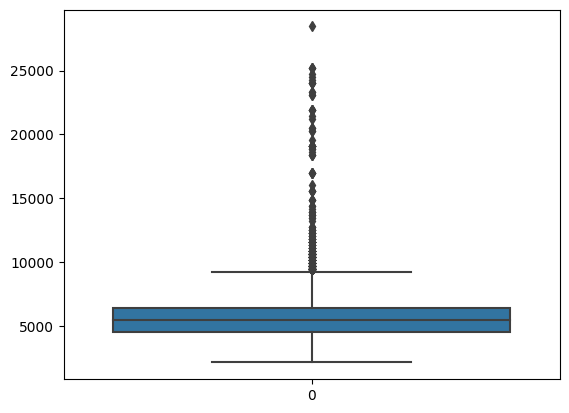

In [29]:
sns.boxplot(df1['Highway Fuel Consumption'])

<Axes: >

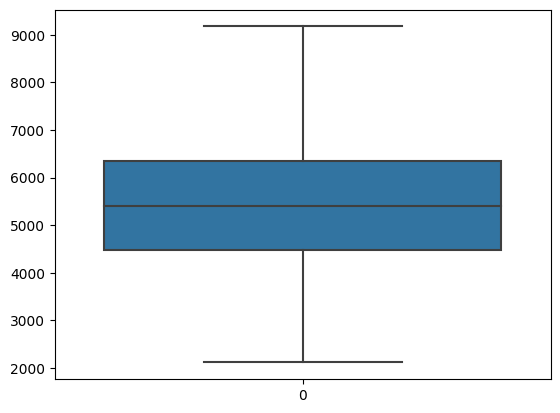

In [30]:
sns.boxplot(df2['Highway Fuel Consumption'])

In [31]:
df2.to_csv('/content/OutliersRemoved.csv', index=False)

In [32]:
# Number of records of the dataset
len(df2)

36371

# **Label Encoding**

In [33]:
df3 = pd.read_csv('/content/OutliersRemoved.csv')

In [34]:
label_encoder_year = LabelEncoder()
df3['Year'] = label_encoder_year.fit_transform(df3['Year'])
label_encoder_make = LabelEncoder()
df3['Make'] = label_encoder_make.fit_transform(df3['Make'])
label_encoder_model = LabelEncoder()
df3['Model'] = label_encoder_model.fit_transform(df3['Model'])
label_encoder_class = LabelEncoder()
df3['Class'] = label_encoder_class.fit_transform(df3['Class'])
label_encoder_drive = LabelEncoder()
df3['Drive'] = label_encoder_drive.fit_transform(df3['Drive'])
label_encoder_transmission = LabelEncoder()
df3['Transmission'] = label_encoder_transmission.fit_transform(df3['Transmission'])
label_encoder_fuelType = LabelEncoder()
df3['Fuel Type'] = label_encoder_fuelType.fit_transform(df3['Fuel Type']) 
df3.head(5)

,Year,Make,Model,Class,Drive,Transmission,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,MPG,City Fuel Consumption,Highway Fuel Consumption
0,0,0,1212,15,0,27,4,2.5,0,0,7,17,4233.870,3998.655
1,0,0,1537,15,0,27,6,4.2,0,0,7,13,3057.795,3057.795
2,0,4,1332,16,2,27,6,4.2,0,0,7,17,3528.225,4704.300
3,0,4,1332,16,2,27,6,4.2,0,0,7,17,3528.225,4469.085
4,0,4,1332,16,2,36,4,2.5,0,0,7,20,4469.085,5174.730


In [35]:
# Save the LabelEncoder objects to pickel files
joblib.dump(label_encoder_year, 'label_encoder_year.pkl')
joblib.dump(label_encoder_make, 'label_encoder_make.pkl')
joblib.dump(label_encoder_model, 'label_encoder_model.pkl')
joblib.dump(label_encoder_class, 'label_encoder_class.pkl')
joblib.dump(label_encoder_drive, 'label_encoder_drive.pkl')
joblib.dump(label_encoder_transmission, 'label_encoder_transmission.pkl')
joblib.dump(label_encoder_fuelType, 'label_encoder_fuelType.pkl')

['label_encoder_fuelType.pkl']

In [36]:
df3.to_csv('/content/LabelEncoded.csv', index=False)

# **Correlations Analysis**

In [37]:
#getting correlations
cor = df3.corr()
cor

,Year,Make,Model,Class,Drive,Transmission,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,MPG,City Fuel Consumption,Highway Fuel Consumption
Year,1.000000,0.000563,0.028988,-0.071344,-0.040547,-0.301586,0.106808,0.067008,0.231225,0.112792,-0.227460,0.145466,0.101339,0.205400
Make,0.000563,1.000000,0.070463,-0.126007,-0.067304,0.043346,-0.290470,-0.308231,0.071485,0.008277,0.096768,0.245080,0.258889,0.205181
Model,0.028988,0.070463,1.000000,0.103381,-0.122758,-0.018913,0.012318,0.037604,-0.095432,0.061543,0.040297,-0.055174,-0.035277,-0.084971
Class,-0.071344,-0.126007,0.103381,1.000000,0.035931,0.062980,0.207302,0.270434,-0.109716,-0.016002,-0.020796,-0.332603,-0.290714,-0.383001
Drive,-0.040547,-0.067304,-0.122758,0.035931,1.000000,0.020743,0.140979,0.125418,-0.049315,0.037563,-0.032083,-0.050814,-0.073524,-0.012458
Transmission,-0.301586,0.043346,-0.018913,0.062980,0.020743,1.000000,-0.163871,-0.130976,-0.113554,-0.057853,0.092539,0.050163,0.052544,0.041042
Engine Cylinders,0.106808,-0.290470,0.012318,0.207302,0.140979,-0.163871,1.000000,0.900577,-0.123545,0.065018,-0.248839,-0.732023,-0.753912,-0.663023
Engine Displacement,0.067008,-0.308231,0.037604,0.270434,0.125418,-0.130976,0.900577,1.000000,-0.187529,0.054400,-0.229915,-0.778666,-0.788257,-0.727442
Turbocharger,0.231225,0.071485,-0.095432,-0.109716,-0.049315,-0.113554,-0.123545,-0.187529,1.000000,-0.039351,-0.221213,0.163506,0.141311,0.189071
Supercharger,0.112792,0.008277,0.061543,-0.016002,0.037563,-0.057853,0.065018,0.054400,-0.039351,1.000000,-0.097569,-0.035574,-0.045364,-0.016191


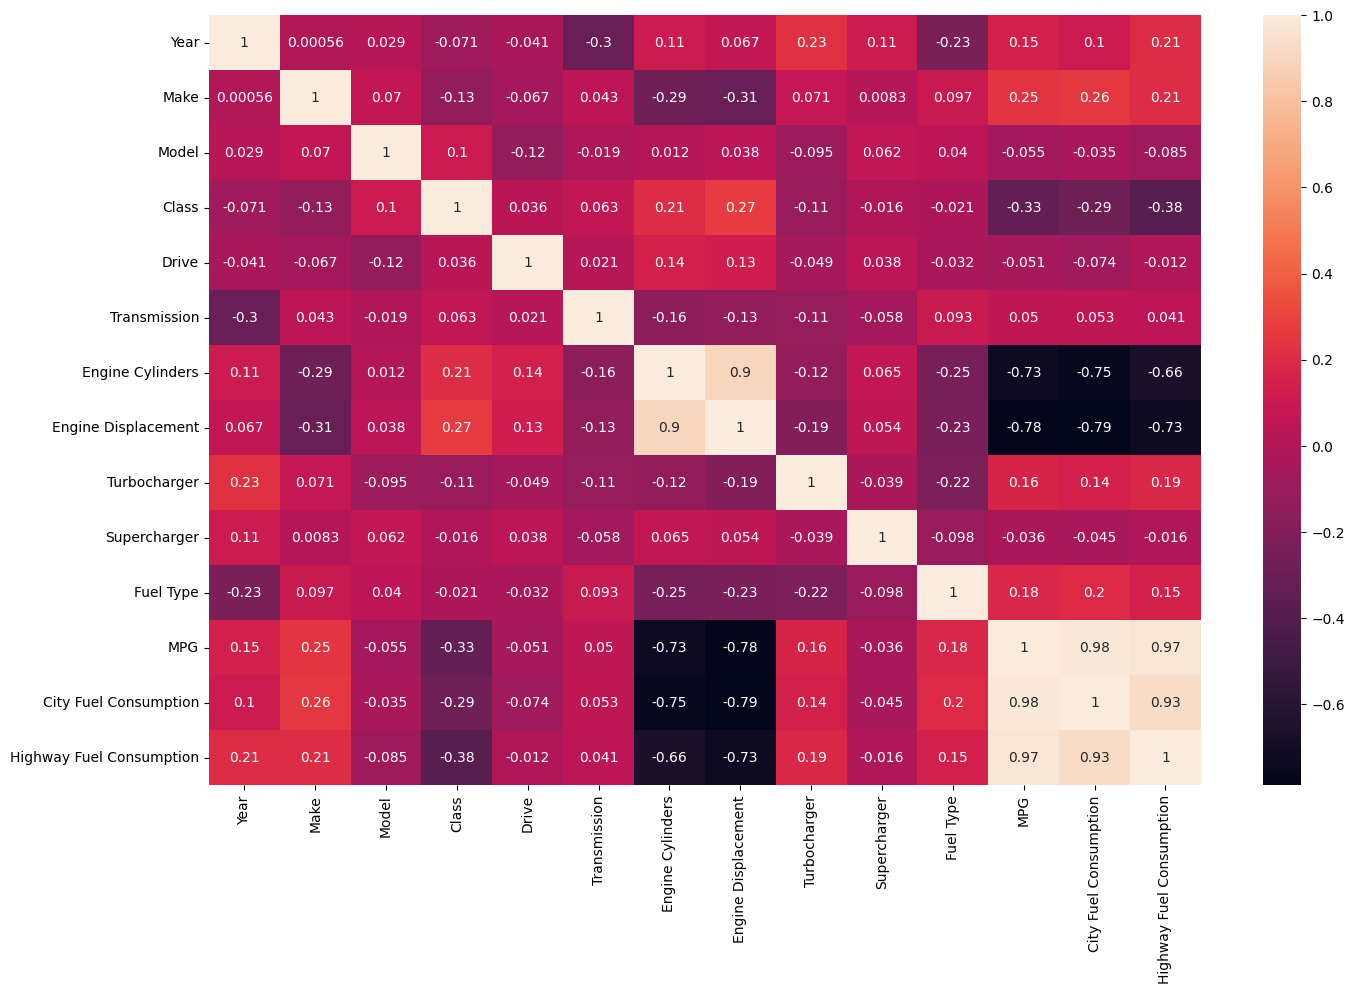

In [38]:
#visualizing the correlations
plt.figure(figsize=(16,10))
sns.heatmap(cor, annot=True)
plt.show()

In [39]:
#dropping off the features that have multicolinearity and low correlation
df4 = df3.drop(columns=['Model', 'Class', 'Drive', 'Engine Displacement', 'Supercharger'])
df4.head(5)

,Year,Make,Transmission,Engine Cylinders,Turbocharger,Fuel Type,MPG,City Fuel Consumption,Highway Fuel Consumption
0,0,0,27,4,0,7,17,4233.870,3998.655
1,0,0,27,6,0,7,13,3057.795,3057.795
2,0,4,27,6,0,7,17,3528.225,4704.300
3,0,4,27,6,0,7,17,3528.225,4469.085
4,0,4,36,4,0,7,20,4469.085,5174.730


In [40]:
df4.to_csv('/content/OnlyCorrelated.csv', index=False)

# **One Hot Encoding The Categorical Data**

In [41]:
df5 = pd.read_csv('/content/OnlyCorrelated.csv')

In [1]:
import sklearn
print(sklearn.__version__)

1.2.2


In [42]:
categorical_features = ['Year', 'Make', 'Transmission', 'Turbocharger', 'Fuel Type']
numerical_features = ['Engine Cylinders', 'MPG']

# Create a separate OneHotEncoder for each categorical feature
onehot_encoders = {}
for feature in categorical_features:
    ohe = OneHotEncoder(sparse_output=False)
    ohe.fit(df5[[feature]])
    onehot_encoders[feature] = ohe
    joblib.dump(ohe, f'onehot_encoder_{feature}.pkl')

# Create a separate MinMaxScaler for each numerical feature
scalers = {}
for feature in numerical_features:
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit(df5[[feature]])
    scalers[feature] = scaler
    joblib.dump(scaler, f'scaler_{feature}.pkl')

# Transform the data using the respective encoders and scalers
X_cat = np.concatenate([onehot_encoders[feature].transform(df5[[feature]]) for feature in categorical_features], axis=1)
X_num = np.concatenate([scalers[feature].transform(df5[[feature]]) for feature in numerical_features], axis=1)
X = np.concatenate((X_cat, X_num), axis=1)
X_cat_names = np.concatenate([onehot_encoders[feature].get_feature_names_out([feature]) for feature in categorical_features], axis=0)
X_num_names = numerical_features
X_names = np.concatenate((X_cat_names, X_num_names))
y = df5[['City Fuel Consumption', 'Highway Fuel Consumption']].values


In [43]:
df6 = pd.DataFrame(X, columns=X_names)
df6[['City Fuel Consumption', 'Highway Fuel Consumption']] = y

In [46]:
df6

,Year_0,Year_1,Year_2,Year_3,Year_4,Year_5,Year_6,Year_7,Year_8,Year_9,...,Fuel Type_2,Fuel Type_3,Fuel Type_4,Fuel Type_5,Fuel Type_6,Fuel Type_7,Engine Cylinders,MPG,City Fuel Consumption,Highway Fuel Consumption
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.142857,0.416667,4233.870,3998.655
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.285714,0.250000,3057.795,3057.795
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.285714,0.416667,3528.225,4704.300
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.285714,0.416667,3528.225,4469.085
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.142857,0.541667,4469.085,5174.730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.285714,0.291667,2822.580,3998.655
36367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.285714,0.250000,2587.365,3763.440
36368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.428571,0.125000,2116.935,3057.795
36369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.428571,0.166667,2116.935,3057.795


In [45]:
df6.to_csv('/content/OneHotEncoded.csv', index=False)

# **Encoding Categorical Data (N/A)**

In [ ]:
df3 = pd.read_csv('/content/OutliersRemoved.csv')

In [ ]:
x= df3.iloc[:,:-2] 
x.head(5)

,Year,Make_Model,Class,Drive,Transmission,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,MPG
0,2000,Chevrolet Cavalier (Bi-fuel CNG),Subcompact Cars,Front-Wheel Drive,Automatic 3-Speed,4,2.2,No,No,Regular Gasoline,22
1,2000,Ford Taurus,Large Cars,Front-Wheel Drive,Automatic 4-Speed,6,3.0,No,No,Regular Gasoline,20
2,2000,Ford Taurus Wagon,Midsize Station Wagons,Front-Wheel Drive,Automatic 4-Speed,6,3.0,No,No,Regular Gasoline,20
3,2000,Ford Ranger 2WD FFV,Standard Pickup Trucks 2WD,Rear-Wheel Drive,Automatic 4-Speed,6,3.0,No,No,Regular Gasoline,17
4,2000,Ford Ranger 2WD FFV,Standard Pickup Trucks 2WD,Rear-Wheel Drive,Manual 5-Speed,6,3.0,No,No,Regular Gasoline,18


In [ ]:
y= df3.iloc[:,11:13]
y.head(5)

,City Fuel Consumption,Highway Fuel Consumption
0,4704.300,5880.375
1,3998.655,6115.590
2,3998.655,5880.375
3,3528.225,4704.300
4,3763.440,4939.515


In [ ]:
#categorical data encoding
x_new = pd.get_dummies(x, columns=['Year', 'Make_Model', 'Class', 'Drive', 'Transmission', 'Fuel Type'])
x_new


,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,MPG,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,...,Transmission_Automatic 8-Speed,Transmission_Automatic 9-Speed,Transmission_Manual 5-Speed,Transmission_Manual 6-Speed,Fuel Type_E85,Fuel Type_Electricity,Fuel Type_Natural Gas,Fuel Type_Premium Gasoline,Fuel Type_Propane,Fuel Type_Regular Gasoline
0,4,2.2,No,No,22,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,6,3.0,No,No,20,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,6,3.0,No,No,20,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,6,3.0,No,No,17,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,6,3.0,No,No,18,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,4,2.0,No,No,21,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2727,6,3.5,No,No,14,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2728,6,3.5,No,No,16,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2729,6,3.6,No,No,17,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
#Binary columns encoding 
x_new['Turbocharger']= LabelEncoder().fit_transform(x_new['Turbocharger'])
x_new['Supercharger']= LabelEncoder().fit_transform(x_new['Supercharger'])  
x_new.head(5)

,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,MPG,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,...,Transmission_Automatic 8-Speed,Transmission_Automatic 9-Speed,Transmission_Manual 5-Speed,Transmission_Manual 6-Speed,Fuel Type_E85,Fuel Type_Electricity,Fuel Type_Natural Gas,Fuel Type_Premium Gasoline,Fuel Type_Propane,Fuel Type_Regular Gasoline
0,4,2.2,0,0,22,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,6,3.0,0,0,20,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,6,3.0,0,0,20,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,6,3.0,0,0,17,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,6,3.0,0,0,18,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
df4 = x_new
df4['City Fuel Consumption'] = y['City Fuel Consumption']
df4['Highway Fuel Consumption'] = y['Highway Fuel Consumption']
df4.head(5)

,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,MPG,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,...,Transmission_Manual 5-Speed,Transmission_Manual 6-Speed,Fuel Type_E85,Fuel Type_Electricity,Fuel Type_Natural Gas,Fuel Type_Premium Gasoline,Fuel Type_Propane,Fuel Type_Regular Gasoline,City Fuel Consumption,Highway Fuel Consumption
0,4,2.2,0,0,22,1,0,0,0,0,...,0,0,0,0,0,0,0,1,4704.300,5880.375
1,6,3.0,0,0,20,1,0,0,0,0,...,0,0,0,0,0,0,0,1,3998.655,6115.590
2,6,3.0,0,0,20,1,0,0,0,0,...,0,0,0,0,0,0,0,1,3998.655,5880.375
3,6,3.0,0,0,17,1,0,0,0,0,...,0,0,0,0,0,0,0,1,3528.225,4704.300
4,6,3.0,0,0,18,1,0,0,0,0,...,1,0,0,0,0,0,0,1,3763.440,4939.515


In [ ]:
df4.to_csv('/content/LabelEncoded.csv', index=False)

In [ ]:
len(df4)

2731

# **Data Normalization (N/A)**

In [ ]:
df5 = pd.read_csv('/content/LabelEncoded.csv')
df5.head(5)

,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,MPG,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,...,Transmission_Manual 5-Speed,Transmission_Manual 6-Speed,Fuel Type_E85,Fuel Type_Electricity,Fuel Type_Natural Gas,Fuel Type_Premium Gasoline,Fuel Type_Propane,Fuel Type_Regular Gasoline,City Fuel Consumption,Highway Fuel Consumption
0,4,2.2,0,0,22,1,0,0,0,0,...,0,0,0,0,0,0,0,1,4704.300,5880.375
1,6,3.0,0,0,20,1,0,0,0,0,...,0,0,0,0,0,0,0,1,3998.655,6115.590
2,6,3.0,0,0,20,1,0,0,0,0,...,0,0,0,0,0,0,0,1,3998.655,5880.375
3,6,3.0,0,0,17,1,0,0,0,0,...,0,0,0,0,0,0,0,1,3528.225,4704.300
4,6,3.0,0,0,18,1,0,0,0,0,...,1,0,0,0,0,0,0,1,3763.440,4939.515


In [ ]:
# apply normalization techniques
for column in df5.columns[:-2]:
    df5[column] = df5[column]  / df5[column].abs().max()
      
# view normalized data
display(df5)

,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,MPG,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,...,Transmission_Manual 5-Speed,Transmission_Manual 6-Speed,Fuel Type_E85,Fuel Type_Electricity,Fuel Type_Natural Gas,Fuel Type_Premium Gasoline,Fuel Type_Propane,Fuel Type_Regular Gasoline,City Fuel Consumption,Highway Fuel Consumption
0,0.333333,0.354839,0.0,0.0,0.785714,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4704.300,5880.375
1,0.500000,0.483871,0.0,0.0,0.714286,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3998.655,6115.590
2,0.500000,0.483871,0.0,0.0,0.714286,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3998.655,5880.375
3,0.500000,0.483871,0.0,0.0,0.607143,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3528.225,4704.300
4,0.500000,0.483871,0.0,0.0,0.642857,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3763.440,4939.515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,0.333333,0.322581,0.0,0.0,0.750000,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4233.870,5880.375
2727,0.500000,0.564516,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3057.795,4233.870
2728,0.500000,0.564516,0.0,0.0,0.571429,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3057.795,4704.300
2729,0.500000,0.580645,0.0,0.0,0.607143,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3293.010,5174.730


In [ ]:
df5.to_csv('/content/Normalized_Without_Outputs.csv', index=False)

In [ ]:
len(df5)

2731